In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from finrl.plot import backtest_stats, get_baseline

d:\Anaconda\envs\fin\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


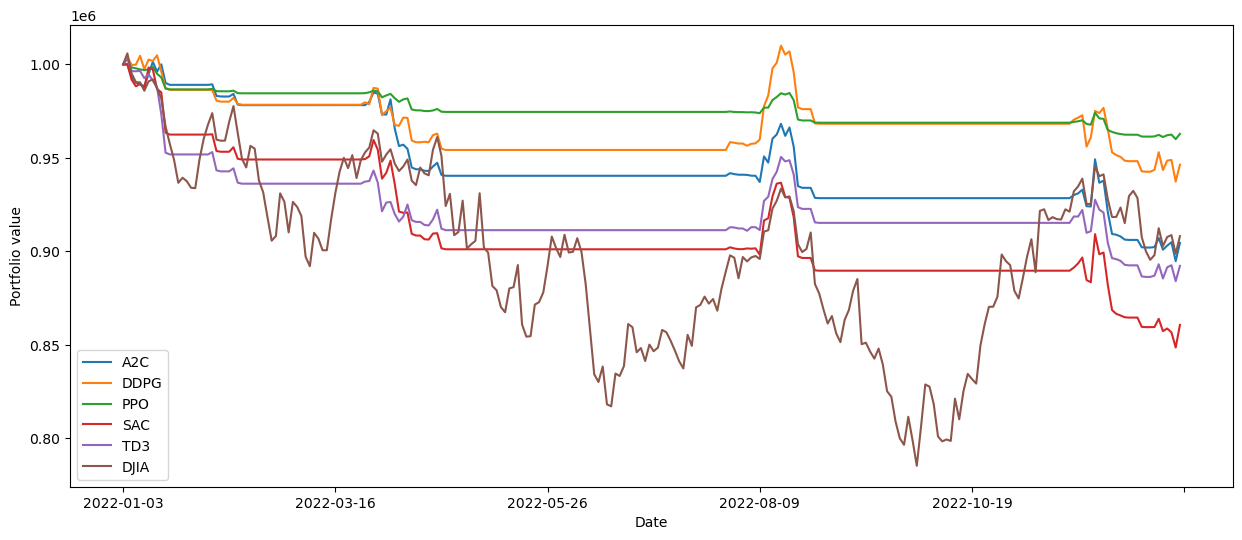

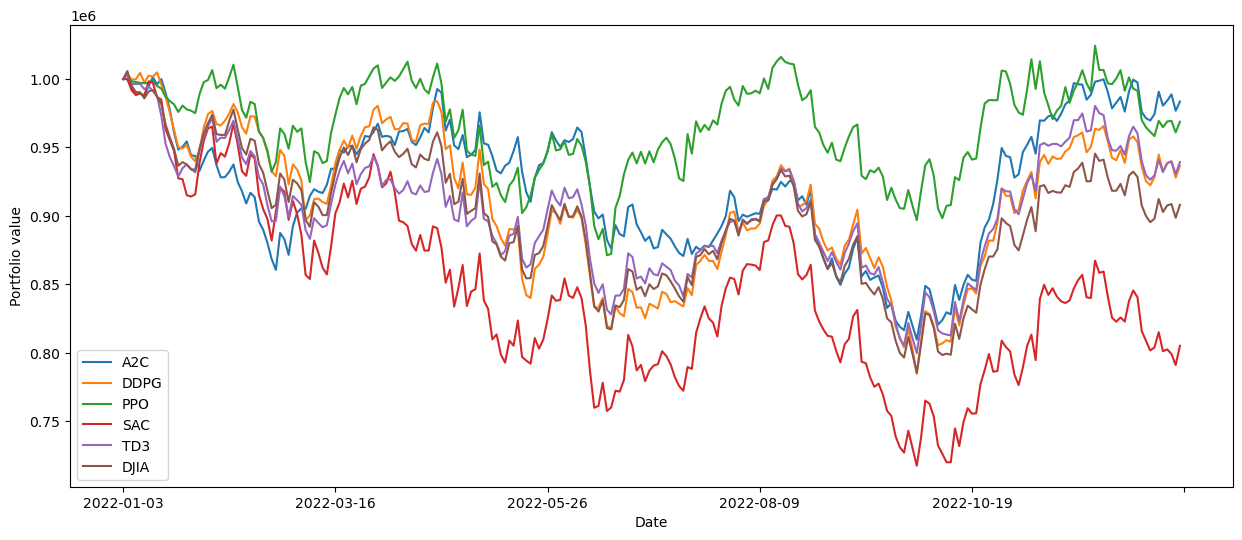

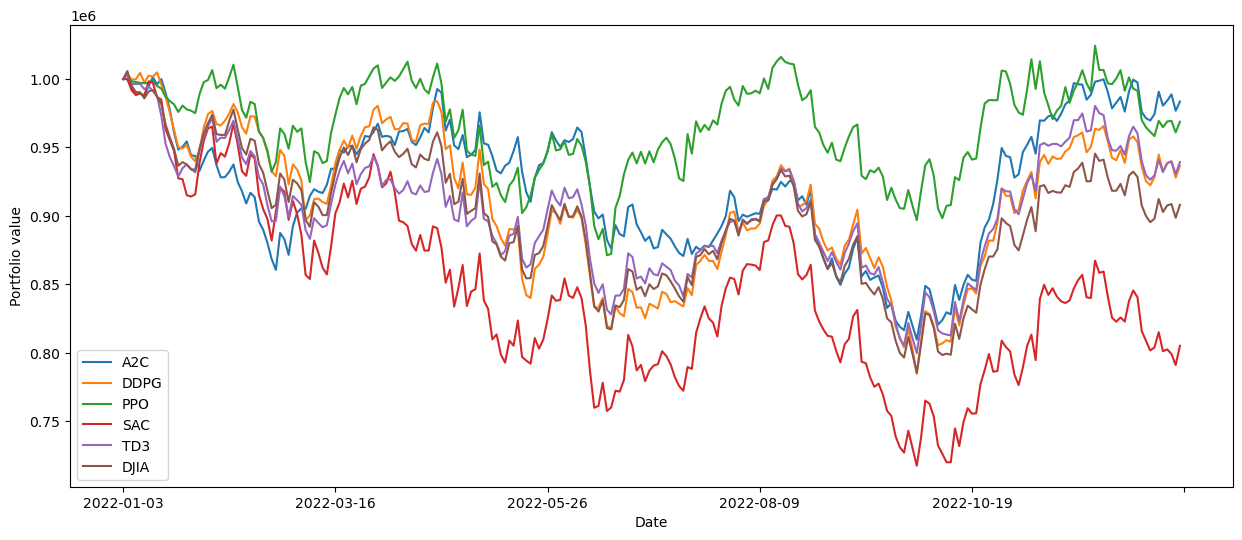

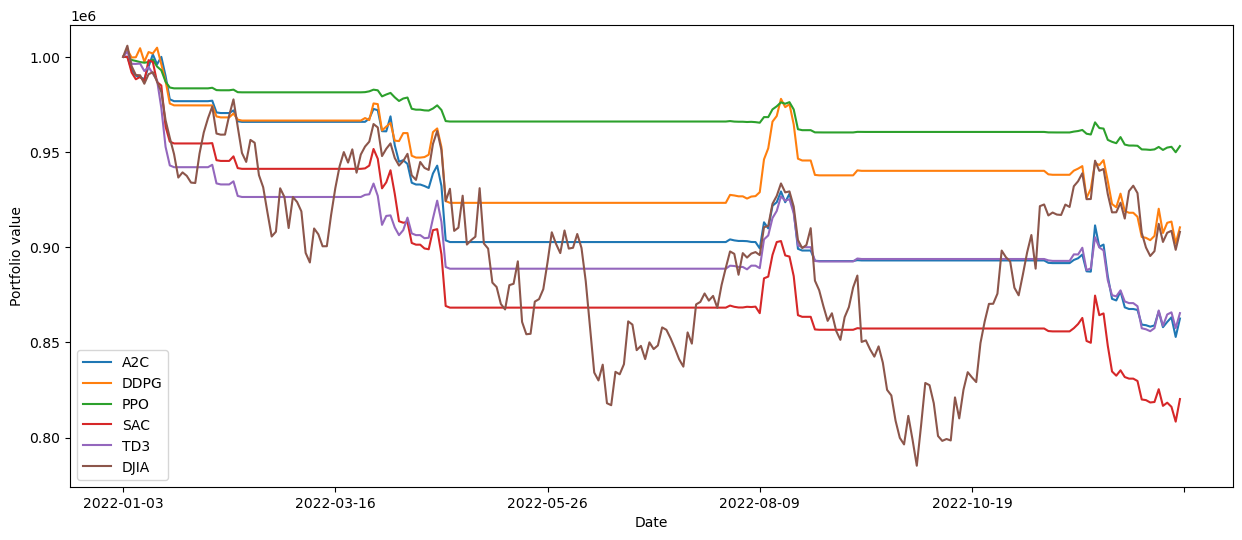

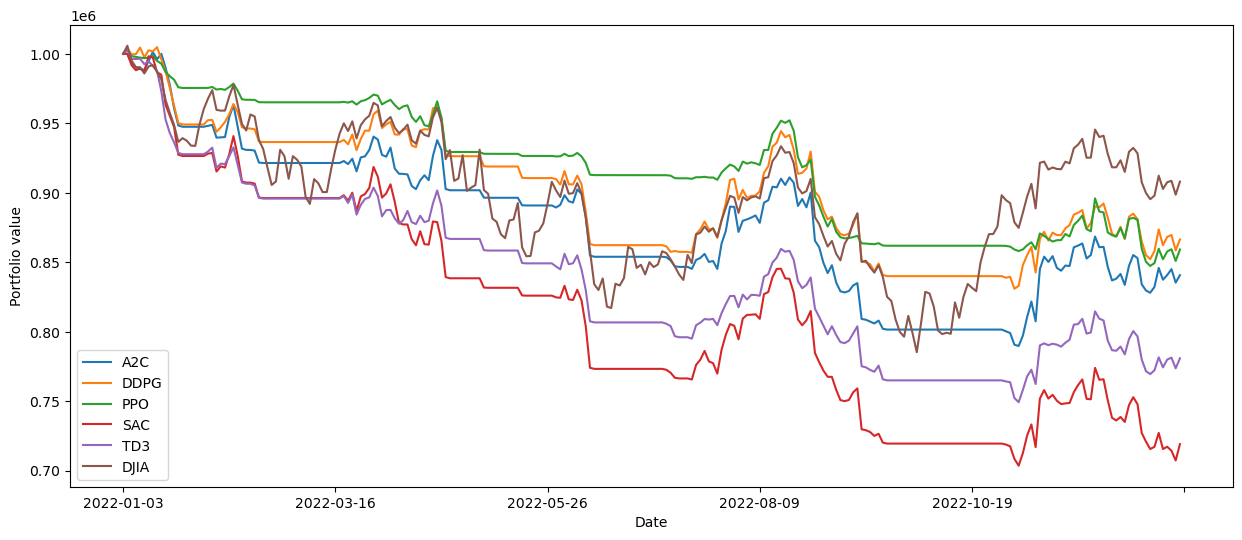

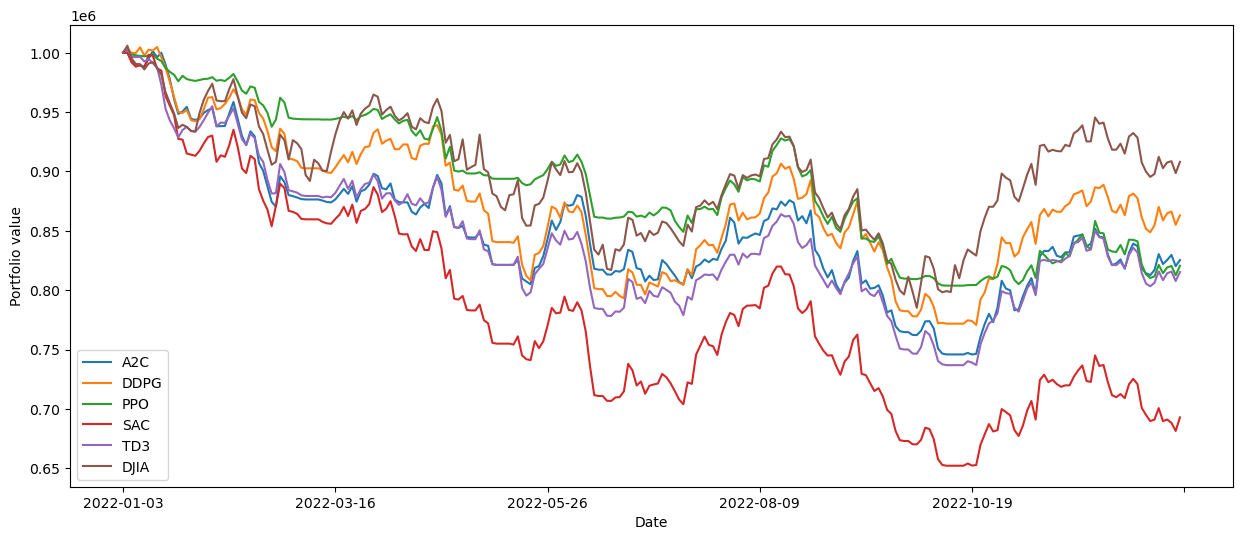

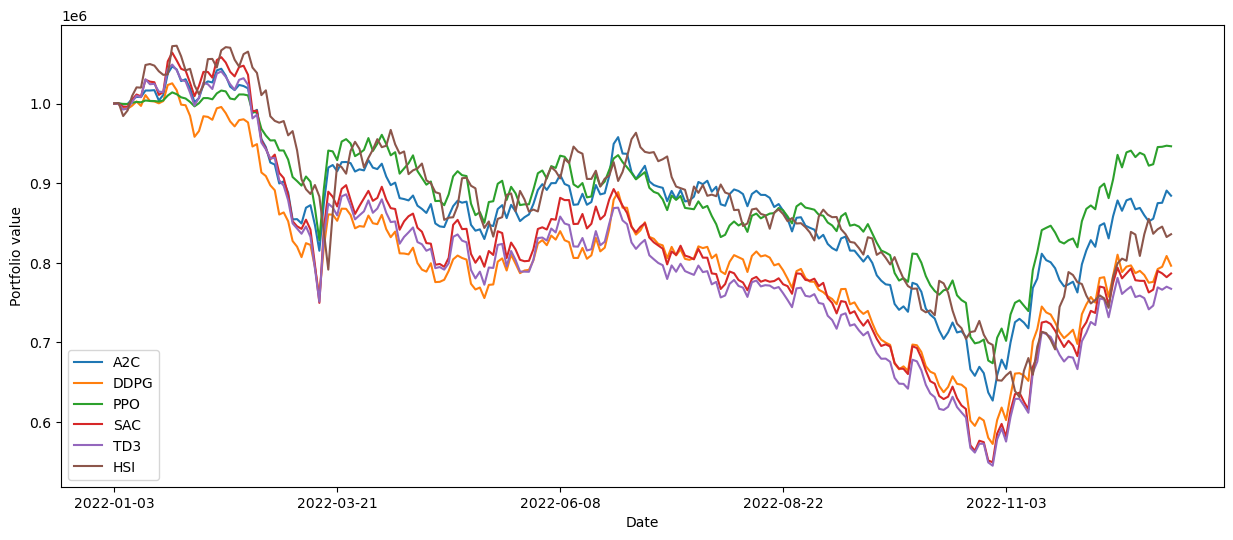

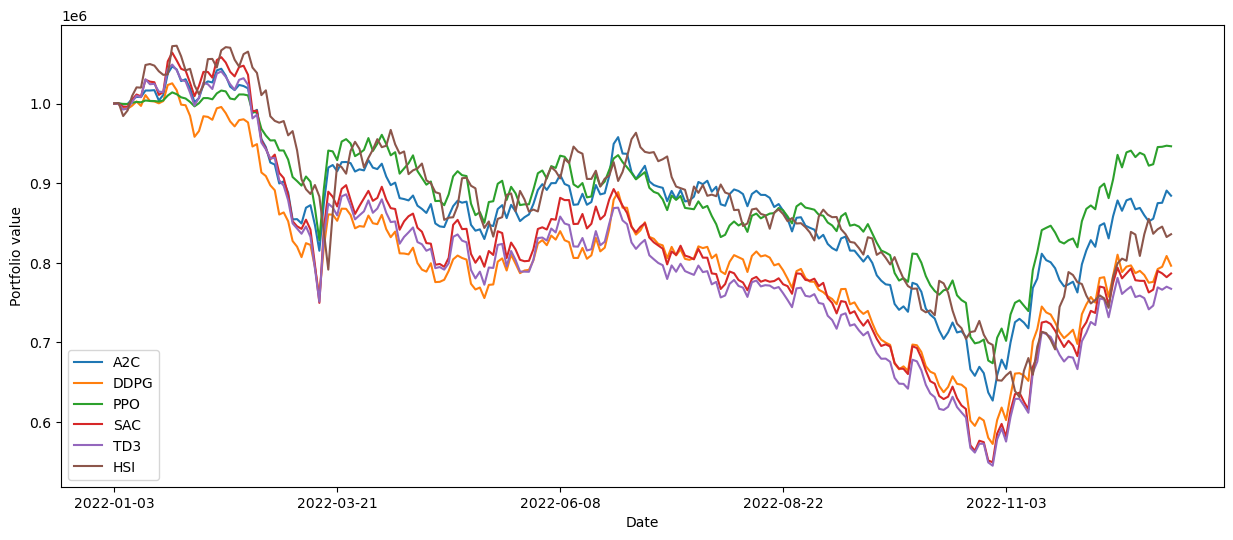

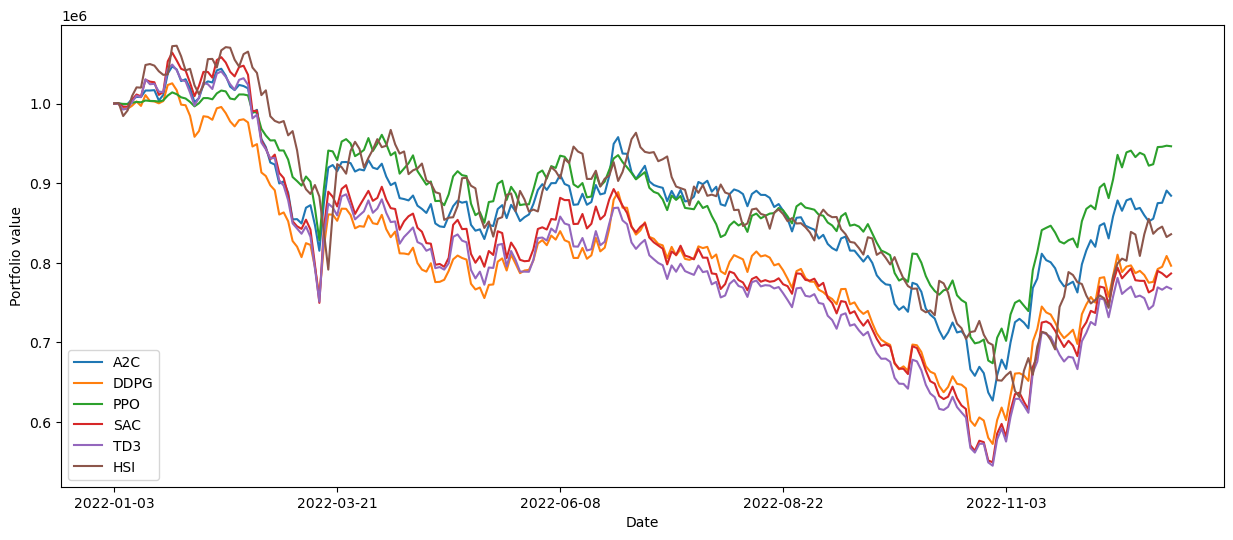

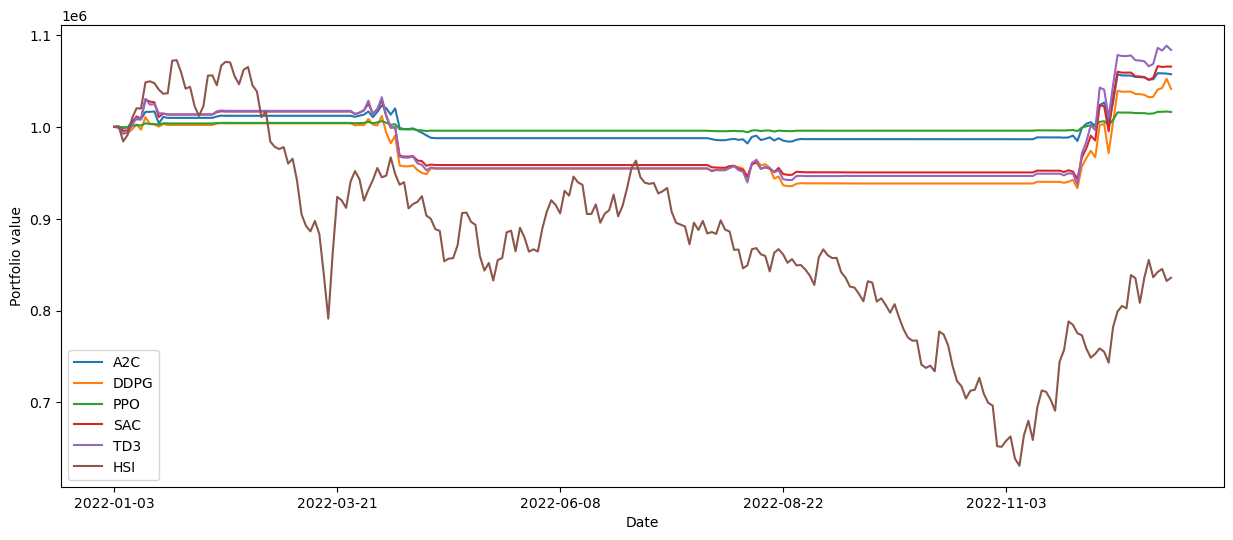

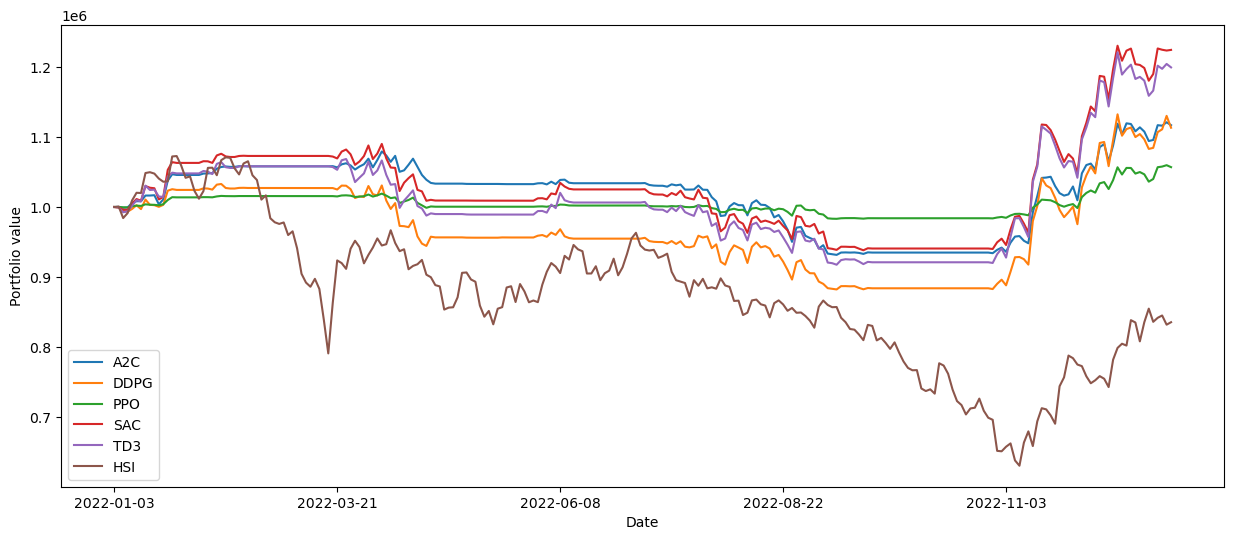

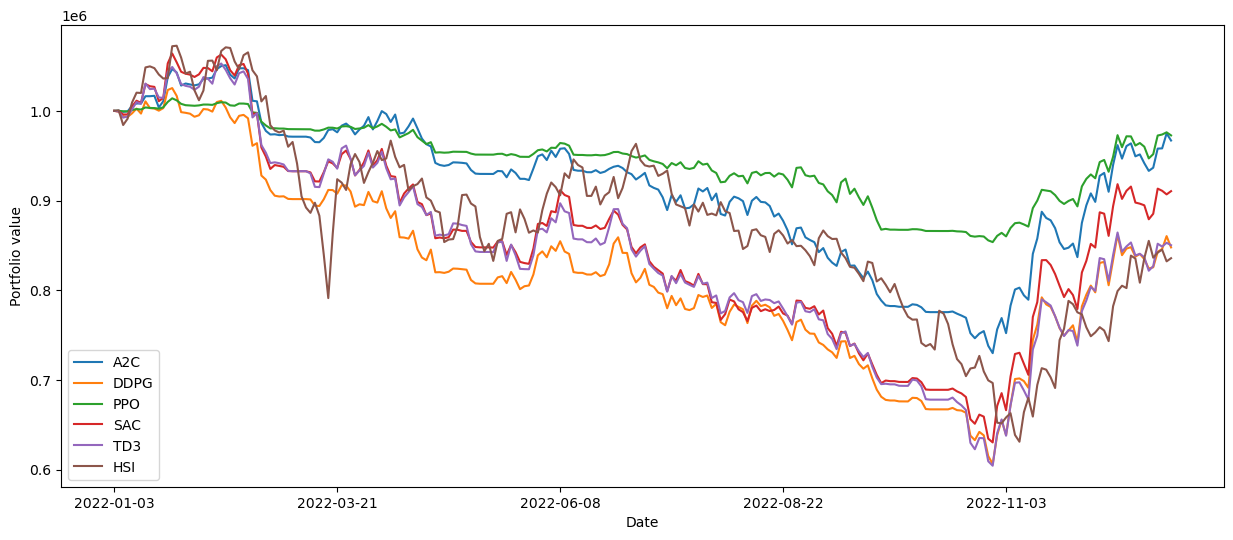

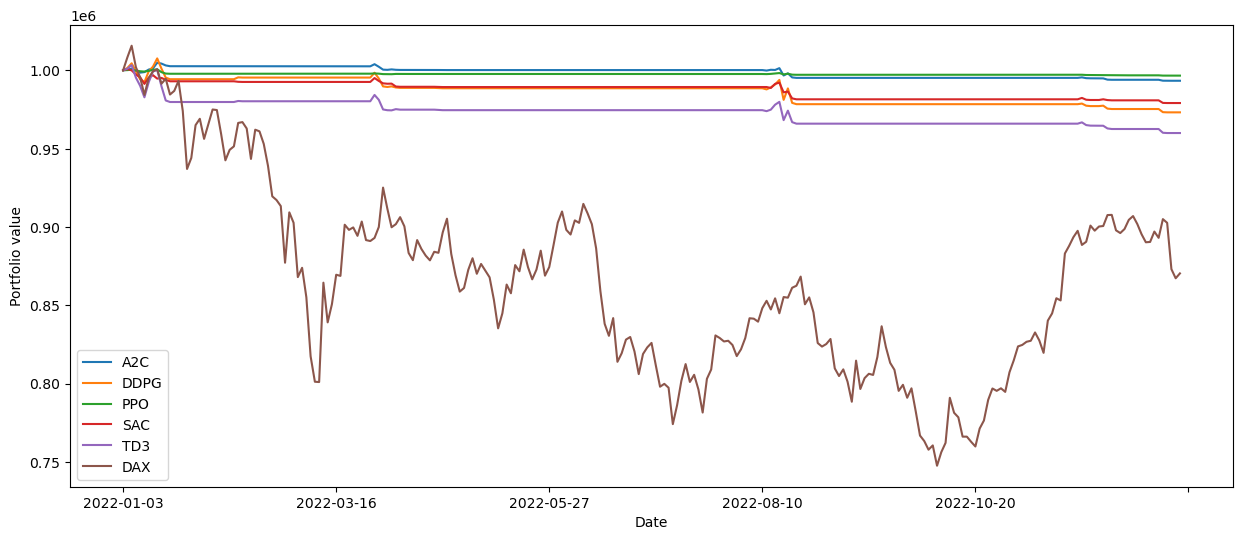

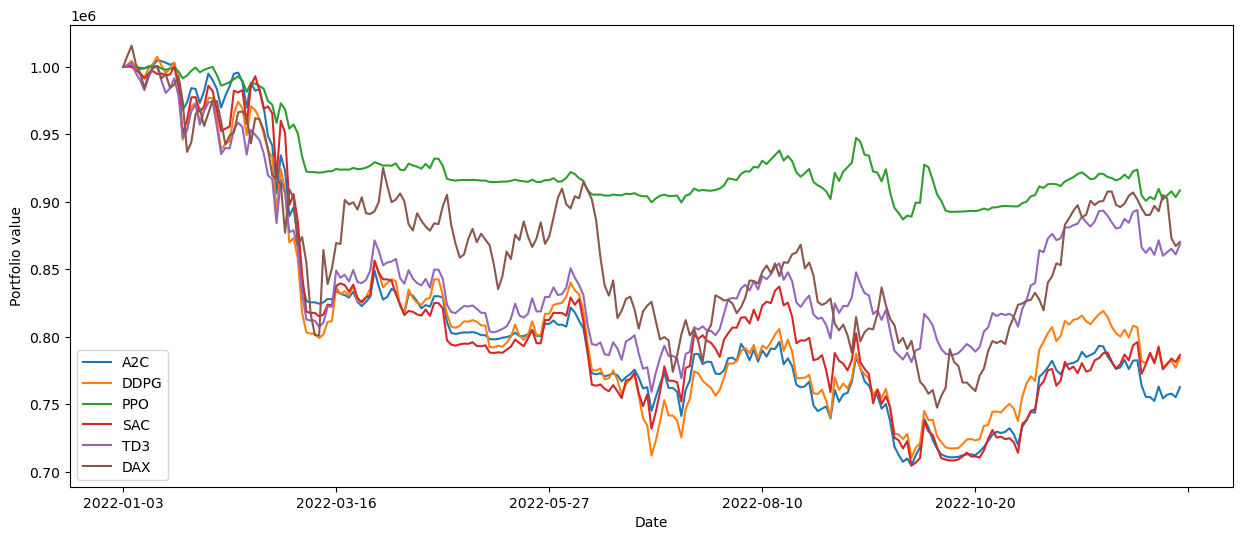

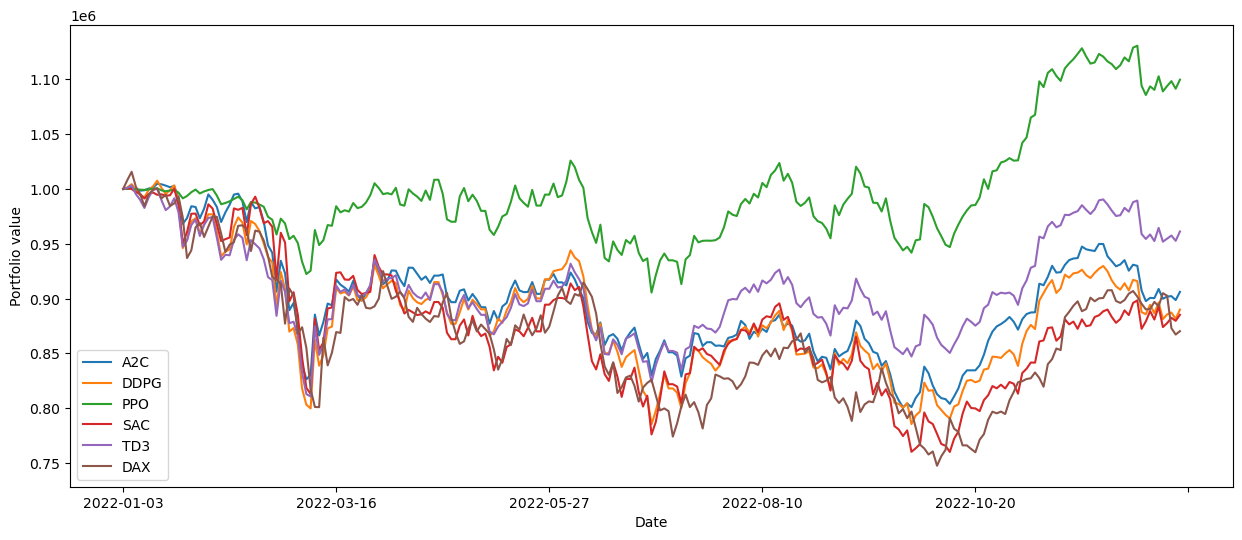

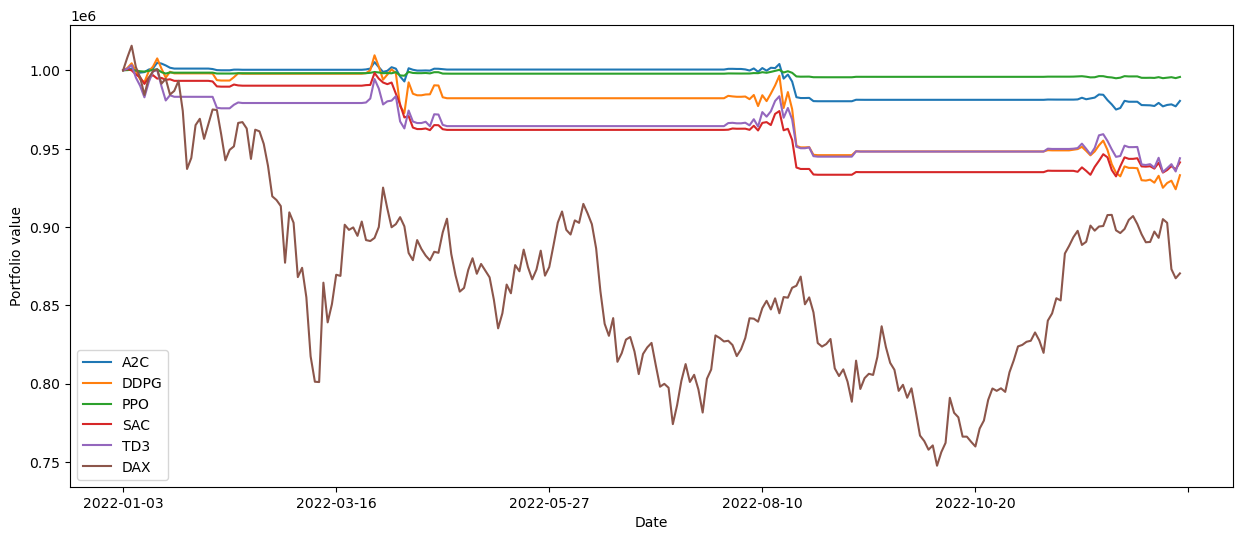

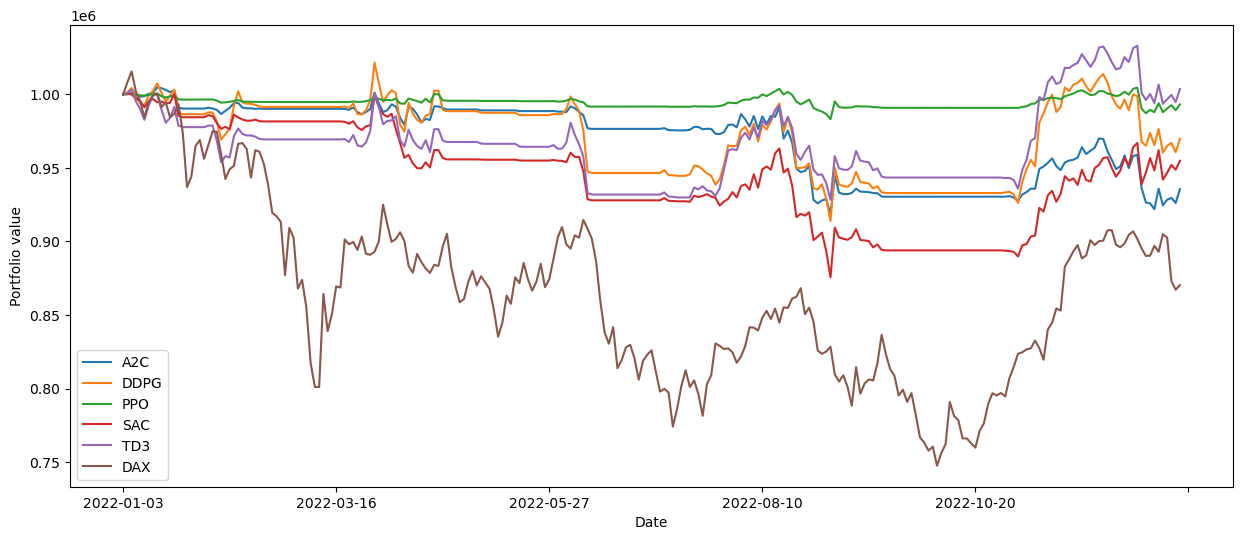

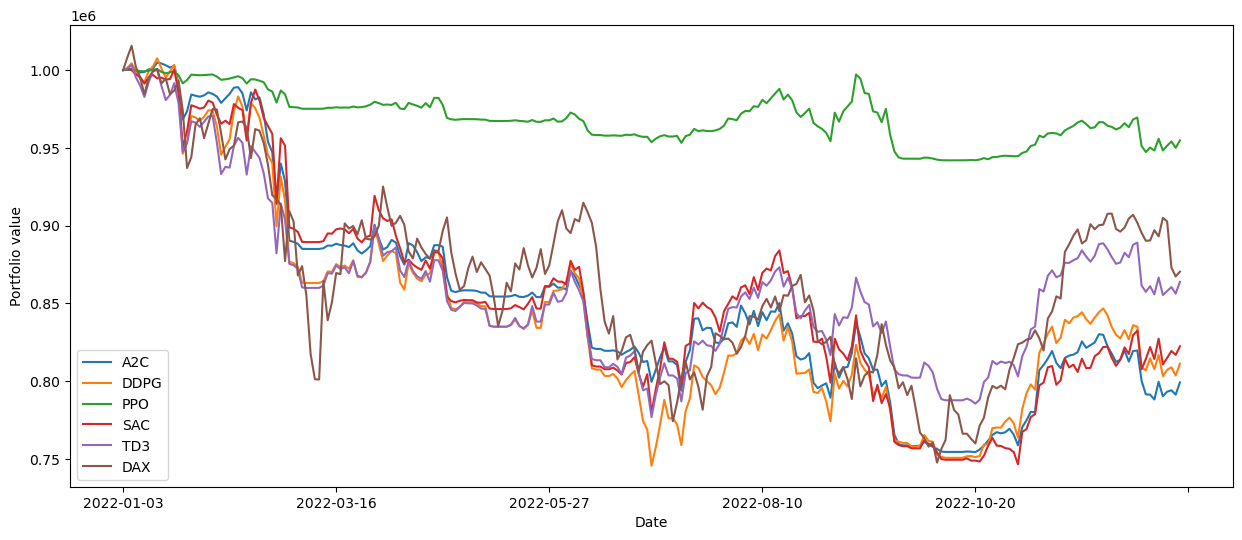

In [3]:
# DATA_NAME = 'HSI'
# RISK = 'turbulence90'
%matplotlib inline
for DATA_NAME in ['DJIA','HSI','DAX']:
    for RISK in ['turbulence30','turbulence60','turbulence90','vix30','vix60','vix90']:      
        df1 = pd.read_csv('results_{}/a2c/df_account_value_{}'.format(DATA_NAME,RISK),index_col=0)
        df2 = pd.read_csv('results_{}/ddpg/df_account_value_{}'.format(DATA_NAME,RISK),index_col=0)
        df3 = pd.read_csv('results_{}/ppo/df_account_value_{}'.format(DATA_NAME,RISK),index_col=0)
        df4 = pd.read_csv('results_{}/sac/df_account_value_{}'.format(DATA_NAME,RISK),index_col=0)
        df5 = pd.read_csv('results_{}/td3/df_account_value_{}'.format(DATA_NAME,RISK),index_col=0)
        df6 = pd.read_csv('results_{}/df_{}.csv'.format(DATA_NAME,DATA_NAME),index_col=0)

        plt.rcParams["figure.figsize"] = (15,6)
        df = pd.concat([df1,df2,df3,df4,df5,df6],axis=1)
        df.columns=['A2C','DDPG','PPO','SAC','TD3', DATA_NAME]
        fig = df.plot()
        fig.set_xlabel('Date')
        fig.set_ylabel('Portfolio value')
        plt.legend(loc='lower left')
        fig.get_figure().savefig('results_{}/{}_{}.png'.format(DATA_NAME, DATA_NAME,RISK))

In [54]:
df1 = pd.read_csv('results_{}/a2c/df_account_value_{}'.format(DATA_NAME,RISK))
df2 = pd.read_csv('results_{}/ddpg/df_account_value_{}'.format(DATA_NAME,RISK))
df3 = pd.read_csv('results_{}/ppo/df_account_value_{}'.format(DATA_NAME,RISK))
df4 = pd.read_csv('results_{}/sac/df_account_value_{}'.format(DATA_NAME,RISK))
df5 = pd.read_csv('results_{}/td3/df_account_value_{}'.format(DATA_NAME,RISK))
df6 = pd.read_csv('results_{}/df_{}.csv'.format(DATA_NAME,DATA_NAME))
df = pd.concat([pd.DataFrame(backtest_stats(account_value=df1)),pd.DataFrame(backtest_stats(account_value=df2)),
                pd.DataFrame(backtest_stats(account_value=df3)),pd.DataFrame(backtest_stats(account_value=df4)),
                pd.DataFrame(backtest_stats(account_value=df5)),pd.DataFrame(backtest_stats(account_value=df6))],axis=1)

df = df.drop(['Skew', 'Kurtosis'])
df.columns=['A2C','DDPG','PPO','SAC','TD3', DATA_NAME]
df.to_csv('results_{}/perf_{}_{}.csv'.format(DATA_NAME,DATA_NAME, RISK), float_format='%.3f')
df

d:\Anaconda\envs\fin\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
d:\Anaconda\envs\fin\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
d:\Anaconda\envs\fin\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
d:\Anaconda\envs\fin\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
d:\A

,A2C,DDPG,PPO,SAC,TD3,HSI
Annual return,-0.122306,-0.214519,-0.056814,-0.224714,-0.244785,-0.173079
Cumulative returns,-0.115921,-0.203911,-0.053744,-0.213674,-0.232913,-0.164302
Annual volatility,0.284112,0.309739,0.268228,0.352793,0.338123,0.331721
Sharpe ratio,-0.320771,-0.629662,-0.086630,-0.551176,-0.667282,-0.411591
Calmar ratio,-0.304690,-0.485198,-0.168441,-0.464250,-0.509173,-0.420391
Stability,0.544908,0.611870,0.477256,0.689443,0.714531,0.708079
Max drawdown,-0.401411,-0.442126,-0.337296,-0.484038,-0.480750,-0.411709
Omega ratio,0.945661,0.896228,0.984230,0.904833,0.887879,0.930511
Sortino ratio,-0.497159,-0.964005,-0.136491,-0.872374,-1.045152,-0.635836
Tail ratio,1.166100,1.199002,1.305370,1.237696,1.197508,1.112133
